# Introduction to Scikit learn (sklearn)
This notebook demonstrates some of the most useful function of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn Workflow 
1. Getting the data ready
2. Choose the right estimateor/algorithm for our model
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model 
5. Impove a model 
6. Save and load a trained model 
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [67]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("heart-disease (1).csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [105]:
# 2. Choose the right model and hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
clf.fit(X_train, y_train);

In [72]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [73]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [74]:
clf.score(X_test, y_test)

0.8524590163934426

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[17,  6],
       [ 5, 33]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [77]:
# 5. Improve the model 
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")


Trying model with 10 estimators..
Model accuracy on test set: 77.05%
Trying model with 20 estimators..
Model accuracy on test set: 80.33%
Trying model with 30 estimators..
Model accuracy on test set: 77.05%
Trying model with 40 estimators..
Model accuracy on test set: 80.33%
Trying model with 50 estimators..
Model accuracy on test set: 81.97%
Trying model with 60 estimators..
Model accuracy on test set: 77.05%
Trying model with 70 estimators..
Model accuracy on test set: 81.97%
Trying model with 80 estimators..
Model accuracy on test set: 80.33%
Trying model with 90 estimators..
Model accuracy on test set: 78.69%


In [80]:
# 6. Save a model and load it 
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [81]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

In [17]:
import warnings
warnings.filterwarnings("ignore")

## 1. Getting our data ready to be used with machine learning 
 Three main things we have to do:

    1. Split the data into features and labels (usually "X" & "y")
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [106]:
car_sale = pd.read_csv("car-sales-extended.csv")
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [87]:
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [20]:
# in case, we want to convert Price that have $ , or . 
car_sale["Price"] = car_sale["Price"].str.replace("[/$/,/.]", "").astype(int)


AttributeError: Can only use .str accessor with string values!

In [ ]:
remove 2 digits at the end of Price columns
car_sale["Price"] = car_sale["Price"].astype(str).str[:-2].astype(int)

In [91]:
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [109]:
X = car_sale.drop("Price", axis=1)
y = car_sale["Price"]

In [110]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [112]:
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [113]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [114]:
dummies = pd.get_dummies(car_sale[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [117]:
# Split data 
X = car_sale.drop("Price", axis=1)
y = car_sale["Price"]

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [118]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.27948889533881816

In [117]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


# 1.2 What if there were missing values?

    1. Fill them with some value (also known as inputation)
    2. Remove the samples with missing data altogether.

In [119]:
car_sale_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [120]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [121]:
car_sale_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [122]:
# Fill the "Make" column
car_sale_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" columns
car_sale_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" columns
car_sale_missing["Odometer (KM)"].fillna(car_sale_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" columns
car_sale_missing["Doors"].fillna(4, inplace=True)

In [130]:
 # Check our dataframe again
car_sale_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [131]:
# Remove rows with missing Price value
car_sale_missing.dropna(inplace=True)

In [132]:
car_sale_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [133]:
len(car_sale_missing)

950

In [136]:
X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

In [141]:
# Let's try and convert our data to numbers 
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transforer = ColumnTransformer([("one_hot",
                                 one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sale_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [143]:
# load transformed_X into dataframe 
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [142]:
dummies = pd.get_dummies(car_sale_missing[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,0,1,0,0,0,0,0
996,3.0,0,0,0,0,1,0,0,0,0,1,0
997,4.0,0,0,1,0,0,0,1,0,0,0,0
998,4.0,0,1,0,0,0,0,0,0,0,1,0


### Feature scaling 

#### What is feature Scaling 
    Feature scaling refers to putting the values in the same range or same scale so that no variable is dominated by the other.
#### Why Scaling 
    Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
#### There two things that can be done on a numerical feature 

    1. Normalization
    1.1 Min-Max scaling
    1.2 mean Normalization
    2. Standardization

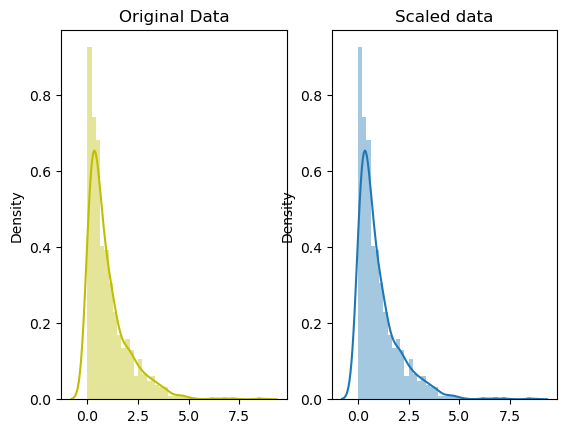

In [148]:
# 1.1 Min-Max Scaling

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# set seed for reproducibility 
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution 
original_data = np.random.exponential(size=1000)

# min-max scale the data between 0 and 1
scaled_data = minmax_scale(original_data)

# plot both together to compare 
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, 
             ax=ax[0], color="y")

ax[0].set_title("Original Data")

sns.distplot(original_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

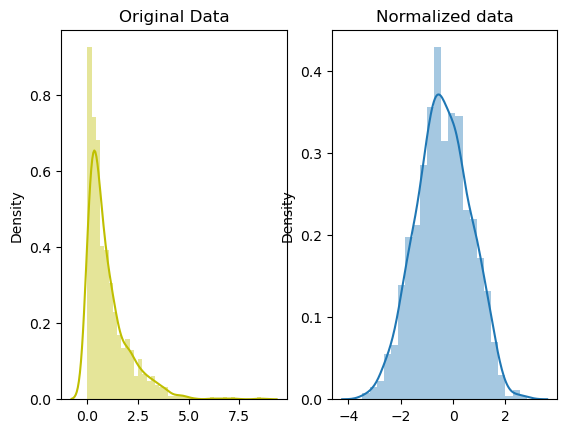

In [151]:
# 1.2 Mean Normalization

# For Box-Cox Transformation 
from scipy import stats

# normalize the exponenial dta with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare 
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, 
             ax=ax[0], 
             color="y")
ax[0].set_title("Original Data")

sns.distplot(normalized_data[0],
             ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

### Scaling vs Normalization

    In both cases, You're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.

In [154]:
# 2. Standardization(z-score): trnasforms your data such that the resulting distribution has a 
# mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_train1[:5]

array([[-0.32868411, -0.67223926,  1.96927621, -0.7933019 , -0.32399441,
         1.46193533, -0.29738086, -0.31926223, -0.83793058, -0.26904657,
         0.40973554, -0.28730468,  0.74134194],
       [-0.32868411,  1.4875656 , -0.50780078, -0.7933019 , -0.32399441,
        -0.68402479, -0.29738086, -0.31926223,  1.19341628, -0.26904657,
         0.40973554, -0.28730468, -1.25666449],
       [-0.32868411,  1.4875656 , -0.50780078, -0.7933019 , -0.32399441,
         1.46193533, -0.29738086, -0.31926223, -0.83793058, -0.26904657,
         0.40973554, -0.28730468,  0.45831991],
       [-0.32868411, -0.67223926, -0.50780078,  1.26055415, -0.32399441,
        -0.68402479, -0.29738086, -0.31926223,  1.19341628, -0.26904657,
         0.40973554, -0.28730468,  0.3604846 ],
       [-0.32868411, -0.67223926,  1.96927621, -0.7933019 ,  3.08647303,
        -0.68402479, -0.29738086, -0.31926223, -0.83793058, -0.26904657,
         0.40973554, -0.28730468, -1.67707474]])

### Option 2: Fill missing values with Scikit-Learn

In [169]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data(1).csv")

In [170]:
car_sale_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [171]:
# Dataset already dealing with missing value but I still follow along 

# Drop the rows with no labels
car_sale_missing.dropna(subset="Price", inplace=True)
car_sale_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [172]:
# Split into X & y
X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

In [176]:
# Fill missing value with Scikit_Learn
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [181]:
car_sale_filled = pd.DataFrame(filled_X, 
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sale_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [182]:
car_sale_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [183]:
# Let's try and convert our data to numbers 
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transforer = ColumnTransformer([("one_hot",
                                 one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sale_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [186]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                     y, 
                                                     test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22011714008302485

# 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    * Sklearn refers to machine learning models, algorithms as estimators.
    * Classification problem -> predicting a category (heart disease or not)
        * Sometimes you'll see 'clf' (short for classifier) used as a classifcation estimator.
    * Regression problem -> predicting a number (selling price of a car)
    If you're working on a machine learning problem and looking to use sklearn and not sure what model you should use, 
    refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [4]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [8]:
# Import algorithm/estimator 
from sklearn.linear_model import Ridge

# Setup random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median house price in $100 1000

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit hte model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the machine learning model 
model.score(X_test, y_test)

0.5758549611440128

what if "Ridge" didn't work or the socre didn't fit our needs?

Well, we could always try a different model..

How about we try an ensemble model (an ensemble is combination of smaller model to try and make better prediction than just a single model)?

Sklearn ensemble model can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [9]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor 

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# SPlit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model 
model = RandomForestRegressor() 
model.fit(X_train, y_train)

# Check the score of the model (on the tes set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a Classification problem

In [10]:
heart_disease = pd.read_csv("heart-disease (1).csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [215]:
# Consulting the map and it says to try LinearSVC
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(0)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaulate the LinearSVC
clf.score(X_test, y_test)

0.7868852459016393

In [240]:
clf.score(X_train, y_train)

1.0

In [216]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Tidbit:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning 
    

In [217]:
# Consulting the map and it says to try LinearSVC but it didn't work well, so it recommand to 
# use RandomForestClassifier

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(0)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaulate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

#### 3. Fit the model/Alorithm on our data and use it to make predictions

#### 3.1 Fitting the model to the data

Different names for:

    1. X = features, features variable, data
    2. y = labels, target, target variables

#### 3.2 Make predictions using a mahine learning model 

2 ways to maek predictions 

    1. predict()
    2. predict_proba()

In [220]:
# Use a trained model to make predictions 
clf.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [221]:
np.array([y_test])

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [224]:
# Compare predicfions to truths labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [223]:
clf.score(X_test, y_test)

0.8524590163934426

In [226]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8524590163934426

Make predictions with predict_proba()

In [229]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.79, 0.21],
       [0.49, 0.51],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.83, 0.17]])

In [230]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 0], dtype=int64)

### 4. Evaluating a machine learning model 

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `Score()` method 
2. The `scoring` parameter
3. Problem-specific metric functions 
    
You can read more about here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [21]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed()

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance 
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [237]:
# The highest value for the .score() method is 1, the lowest is o 
clf.score(X_train, y_train)

1.0

In [238]:
clf.score(X_test, y_test)

0.7704918032786885

### 4.2. Evaluating a model using the scoring parameter

In [242]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed()

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance 
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [243]:
clf.score(X_test, y_test)

0.8360655737704918

In [246]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.80327869, 0.83333333, 0.8       ])

In [247]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross_validation score 
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two score 
clf_single_score, clf_cross_val_score

(0.8360655737704918, 0.8248087431693989)

In [249]:
# Default scoring parameter of classifier = mean accuracy 
clf.score()

In [250]:
# Scoring parameter set to NOne by default 
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 

    1. Accuracy 
    2. Area under ROC curve 
    3. Confusion matrix 
    4. Classification report 
    
    Accuracy

In [255]:
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(clf, X, y, cv=5)
print(f"The heart disease accuracy classification of cross validation score is {np.mean(cross_validation_score)*100:.2f} %")

The heart disease accuracy classification of cross validation score is 82.49 %


** Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve 

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negatvie = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [22]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.78, 0.22],
        [0.21, 0.79],
        [0.94, 0.06],
        [0.23, 0.77],
        [0.41, 0.59],
        [0.13, 0.87],
        [0.24, 0.76],
        [0.32, 0.68],
        [0.6 , 0.4 ],
        [0.08, 0.92]]),
 61)

In [37]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.22, 0.79, 0.06, 0.77, 0.59, 0.87, 0.76, 0.68, 0.4 , 0.92])

In [24]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.12, 0.16, 0.16, 0.24, 0.24, 0.28, 0.28, 0.36, 0.4 , 0.48, 0.48,
       0.52, 0.6 , 0.8 , 0.88, 1.  ])

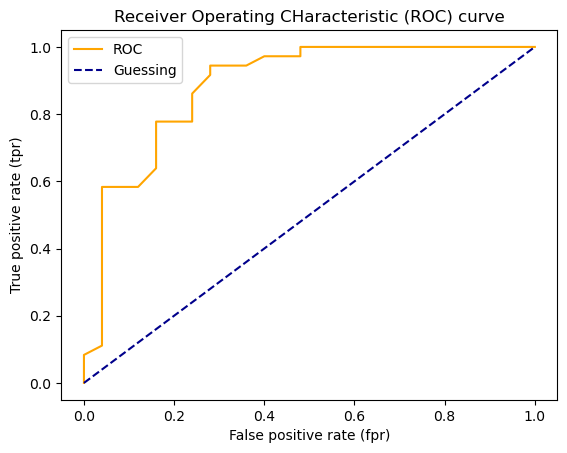

In [29]:
# Create a function for plotting ROC curves 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating CHaracteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8844444444444444

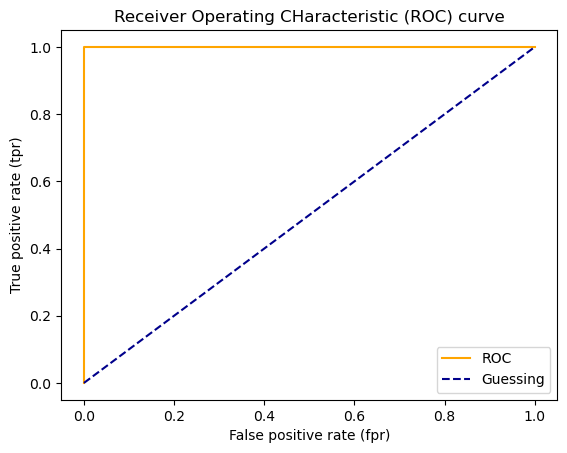

In [34]:
# Plot perfect ROC curve and AUC score 
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [35]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [39]:
from sklearn.metrics import confusion_matrix 

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  4],
       [ 8, 28]], dtype=int64)

In [41]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21,4
1,8,28


<AxesSubplot:>

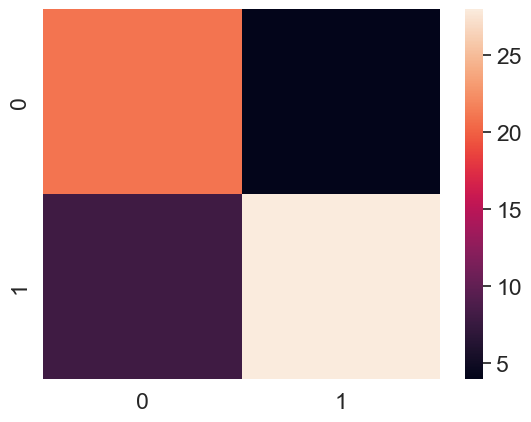

In [42]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns 

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)


### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn 

In [44]:
import sklearn 
sklearn.__version__

'1.0.2'

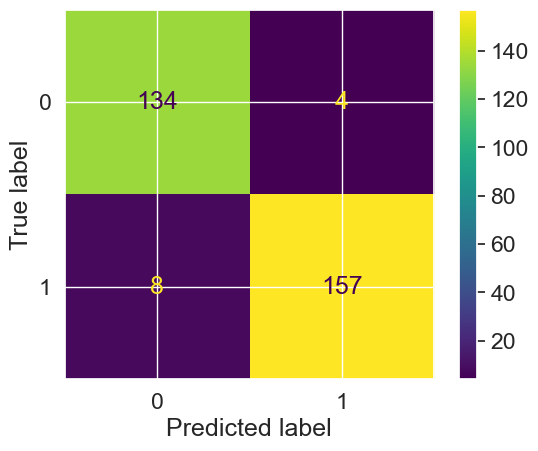

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

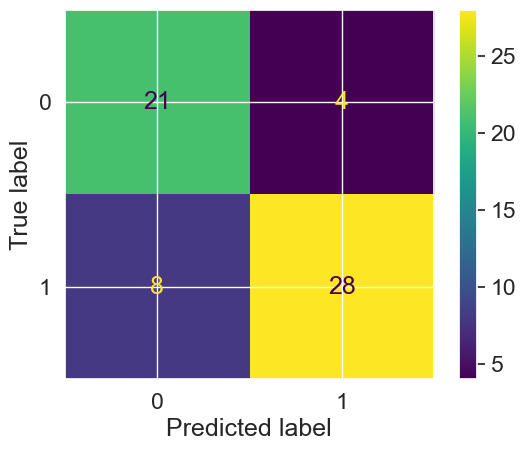

In [47]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds)

### Classification Report 

In [48]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.88      0.78      0.82        36

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [50]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classification metrics:

   * **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1).
   **Precision** and **recall** become more important when classes are imbalanced.
   * if false positive predictions are worse than false negatives, aim for higher **precision**.
   * if false negative predictions are worse than false positives, aim for higher **recall**.
   * **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

    1. R^2 (pronounced r-squared) or coefficient of determination 
    2. Mean absolute error (MAE)
    3. Mean squared error (MSE)

R^2 

What R-squared does: Compares your models to the mean of the targets. Values can ragne from negative infinity (a very poor model)  to 1. For example, if all your model does predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 

In [65]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
model.score(X_test, y_test)

0.8065734772187598

In [67]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [69]:

y_test.mean()

2.0550030959302275

In [70]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [71]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [72]:
r2_score(y_true=y_test, 
         y_pred=y_test_mean)

0.0

In [73]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

 **Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.


In [74]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae


0.32659871732073664

In [75]:
df = pd.DataFrame({"actual value": y_test, 
                   "predicted value": y_preds})
df["difference"] = df["predicted value"] - df["actual value"]
df.head(10)

,actual value,predicted value,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [77]:
# MAE using formulas and difference 
np.abs(df["difference"]).mean()

0.32659871732073803

**Mean squared error (MSE)**

MSE is the mean of the square of errors between actual value and predicted value 

In [78]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [79]:
df["squared_difference"] = np.square(df["difference"])
df.head(5)

,actual value,predicted value,difference,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [80]:
squared = np.square(df["difference"])
squared.mean()

0.25346785208245565

### 4.2.3 Finally using the scoring parameter

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [82]:
np.random.seed(42)

# Cross-validation accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
# if scoring=None, estimator's default scoring evaluation were used 
# (accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [83]:
# Cross_validation accuracy 
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [84]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [85]:
# Cross-validation accuracy 
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [86]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [89]:
# Cross-validation precision
print(f"The cross-validation precision is : {np.mean(cv_acc)}")

The cross-validation precision is : 0.8248087431693989


In [88]:
# Recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [91]:
print(f"The cross-validation recall is : {np.mean(cv_acc)}")

The cross-validation recall is : 0.8248087431693989


Let's see the `scoring` parameter being using for a regression problem

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [95]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [97]:
housing_df.shape

(20640, 9)

In [98]:
np.mean(cv_r2)

0.6520824166120266

In [103]:
# Mean squared error 
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43116452683014017

In [100]:
cv_mse

array([-0.51296289, -0.35070541, -0.37298376, -0.44907837, -0.46924468])

In [104]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46550312092054275

In [102]:
cv_mae

array([-0.54535682, -0.405814  , -0.43474105, -0.46311862, -0.47328158])

### 4.3 Using different evaluation metrics as Scikit-Learn functions 

The 3rd way to evaluate scikit-learn models/estimators is using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model 
clf = RandomForestClassifier()

# Fit model 
clf.fit(X_train, y_train)

# Make prediction
y_preds = clf.predict(X_test)
# Evaluate model using evaluation functions 
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model 
model = RandomForestRegressor()

# Fit model 
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

# Evaluate model 
print("Regression metrics on the test set")
print(f"R-2 score:{r2_score(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")


Regression metrics on the test set
R-2 score:0.8065734772187598
MSE:0.2534678520824551
MAE:0.32659871732073664


### 5. Improving a model 

First predictions = baseline predictions. First model = baseline model

From a data perspective:
    
* Could we collect more data? (generally, the more data, the better)
* Could we imporve our data?

From a model perspective:
    
* Is there a better model we could use?
* Could we improve the currrent model?

Hyperparameter vs. Parameter

* Parameters = model find these patterns in data 
* Hyperparameter = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:

1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively GridSearchCV


### 5.1 Tuning hyperparameter by hand

Let's make 3 sets: Training, validation, and test

In [15]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [23]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dic = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dic

In [24]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test data sets 
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make a baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [40]:
# another method to extract data 
X_train, X_vt, y_train, y_vt =  train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.5)

clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train, y_train)
# Make a baseline prediction 
y_preds_2 = clf_2.predict(X_validation)

# Evaluate the classifier with Tuning hyperparameter
clf_2_metrics = evaluate_preds(y_validation, y_preds_2)
clf_2_metrics


Acc: 75.56%
Precision: 0.72
Recall: 0.82
F1: 0.77


{'accuracy': 0.76, 'precision': 0.72, 'recall': 0.82, 'f1': 0.77}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1500],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instantiate RandomForestClassifier 
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of model to try 
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [30]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [41]:
# Make prediction with the best hyperparameter
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the prediction 
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 95.65%
Precision: 0.95
Recall: 0.95
F1: 0.95


### 5.3 Hyperparameter tuning with GridSearchCV

In [32]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1500],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [35]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [ 6],
          'min_samples_leaf': [1, 2]}

In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instantiate RandomForestClassifier 
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSerchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [38]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [39]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


Let's compare our different models metrics


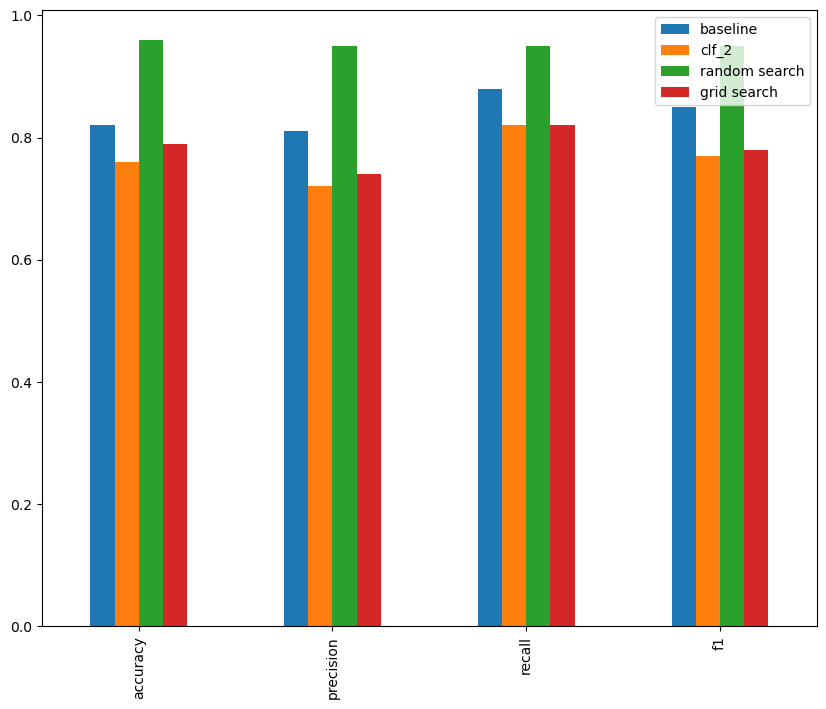

In [45]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics, 
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

### 6. Saving and loading trained machine learning models 

Two ways to save and load machine learning models:
    
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [47]:
import pickle 

# Save an txtisting model to file 
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))


In [48]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))


In [49]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 95.65%
Precision: 1.00
Recall: 0.90
F1: 0.95


{'accuracy': 0.96, 'precision': 1.0, 'recall': 0.9, 'f1': 0.95}

**Joblib**

In [50]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [51]:
# import a saved joblib model 
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [52]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 95.65%
Precision: 1.00
Recall: 0.90
F1: 0.95


{'accuracy': 0.96, 'precision': 1.0, 'recall': 0.9, 'f1': 0.95}

### 7. Putting it all together 


In [131]:
data = pd.read_csv("car-sales-extended-missing-data(1).csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [132]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all one cell):
    
    1. Fill missing data 
    2. Convert data to numbers 
    3. Build a model on the data 
    

In [133]:
# Getting data ready 
import pandas as pd 
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder

# Modeling 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV 

# Setup random seed 
np.random.seed(42)

# Import data adn drop rows with missing labels 
data = pd.read_csv("car-sales-extended-missing-data(1).csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline 
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data 
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [137]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [138]:
gs_model.score(X_test, y_test)

0.3339554263158365